In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.classification import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')

## Data Understanding

In [3]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [4]:
df.shape

(287, 25)

In [5]:
for column in df.columns:
    print(f"Value counts untuk kolom '{column}':")
    print(df[column].value_counts())
    print("\n", "="*50, "\n")

Value counts untuk kolom 'Username':
Username
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: count, Length: 285, dtype: int64


Value counts untuk kolom 'EnterpriseID':
EnterpriseID
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: count, Length: 287, dtype: int64


Value counts untuk kolom 'StatusPernikahan':
StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64


Value counts untuk kolom 'JenisKelamin':
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64


Value counts untuk kolom 'StatusKepegawaian':
StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: coun

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

## Data Preparation

In [7]:
# impute numeric missing value
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median())
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median())
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median())
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median())

# impute categoric missing value
df['IkutProgramLOP'] = df['IkutProgramLOP'].fillna('unknown')
df['AlasanResign'] = df['AlasanResign'].fillna('unknown')

In [8]:
# merubah format tanggal
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

In [9]:
# merubah format nilai
df['IkutProgramLOP'].replace({'1.0':'yes', '0.0':'no'}, inplace=True)

df['PernahBekerja'].replace('yes', 1, inplace=True)
df['PernahBekerja'] = df['PernahBekerja'].astype(int)

df['StatusPernikahan'].replace('-', 'Lainnya', inplace=True)

df['AlasanResign'].replace('Product Design (UI & UX)', 'unknown', inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                          0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [12]:
# menghapus kolom yang memiliki nilai seragam
uniform_columns = []

for i in df.columns:
    if df[i].nunique() == 1:
        uniform_columns.append(i)

uniform_columns

['PernahBekerja']

In [13]:
df2 = df.drop(['PernahBekerja', 'Username', 'EnterpriseID', 'NomorHP', 'Email'], axis=1)

## Feature Engineering

In [14]:
df2.columns

Index(['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan',
       'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'IkutProgramLOP',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')

In [15]:
df2['Umur'] = (df2['TanggalPenilaianKaryawan'] - df2['TanggalLahir']).dt.days // 365
df2['LamaBekerja'] = (df2['TanggalPenilaianKaryawan'] - df2['TanggalHiring']).dt.days // 365
df2['StatusResign'] = np.where(df2['TanggalResign'].isna(), 0, 1)
df2['YearHiring'] = df2['TanggalHiring'].dt.year
df2['YearResign'] = df2['TanggalResign'].dt.year

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   JenisKelamin                        287 non-null    object        
 2   StatusKepegawaian                   287 non-null    object        
 3   Pekerjaan                           287 non-null    object        
 4   JenjangKarir                        287 non-null    object        
 5   PerformancePegawai                  287 non-null    object        
 6   AsalDaerah                          287 non-null    object        
 7   HiringPlatform                      287 non-null    object        
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    float64       
 10  JumlahKeikutsertaanProjek 

## EDA

In [17]:
df_hiring = df2.groupby('YearHiring').size().reset_index(name='JumlahMasuk')
df_resign = df2.groupby('YearResign').size().reset_index(name='JumlahKeluar')

In [18]:
df_changes = pd.merge(df_hiring, df_resign, left_on='YearHiring', right_on='YearResign', how='outer')
df_changes.fillna(0, inplace=True)
df_changes['Year'] = df_changes[['YearHiring', 'YearResign']].max(axis=1)
df_changes = df_changes[['Year', 'JumlahMasuk', 'JumlahKeluar']].sort_values('Year')

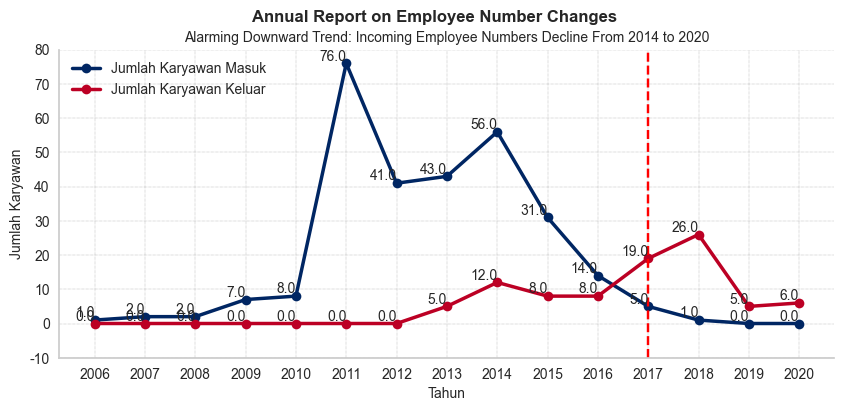

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(df_changes['Year'], df_changes['JumlahMasuk'], label='Jumlah Karyawan Masuk', marker='o', 
        linewidth=2.5, color='#002663')
plt.plot(df_changes['Year'], df_changes['JumlahKeluar'], label='Jumlah Karyawan Keluar', marker='o',
        linewidth=2.5, color='#bc0024')

for i in range(len(df_changes)):
    plt.text(df_changes['Year'][i], df_changes['JumlahMasuk'][i], df_changes['JumlahMasuk'][i], fontsize=10, 
             ha='right', va='bottom')
    plt.text(df_changes['Year'][i], df_changes['JumlahKeluar'][i], df_changes['JumlahKeluar'][i], fontsize=10, 
             ha='right', va='bottom')
    
plt.axvline(x=2017, color='red', linestyle='--')

plt.grid(linestyle='-', linewidth=0.1, color='grey')
plt.xticks(rotation=0)

y_tick_label,location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

plt.xlabel('Tahun', size=10)
plt.ylabel('Jumlah Karyawan', size=10)
plt.suptitle('Annual Report on Employee Number Changes', fontweight='bold', fontsize=12)
plt.title('Alarming Downward Trend: Incoming Employee Numbers Decline From 2014 to 2020', fontsize=10)
plt.xticks([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.legend()
plt.grid(linestyle=':', linewidth=0.35, color='grey')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show()

In [20]:
df2_divisi = df2['Pekerjaan'].value_counts()

df2_resign = df2[df2['StatusResign']==1]['Pekerjaan'].value_counts()
df2_still_working = df2[df2['StatusResign'] == 0]['Pekerjaan'].value_counts()

df2_per_resign = (df2_resign / df2_divisi) * 100
df2_per_resign = df2_per_resign.reset_index(name='ResignPercentage')

df2_per_still_working = (df2_still_working / df2_divisi) * 100
df2_per_still_working = df2_per_still_working.reset_index(name='StillWorkingPercentage').rename(columns={'index': 'Pekerjaan'})

In [21]:
df2_per_resign = df2_per_resign.dropna()
df2_per_resign

,Pekerjaan,ResignPercentage
0,Data Analyst,50.000000
1,Data Engineer,30.000000
5,Product Design (UI & UX),37.500000
7,Product Manager,35.294118
10,Software Engineer (Android),29.166667
11,Software Engineer (Back End),25.688073
12,Software Engineer (Front End),38.888889


In [22]:
df2_per_still_working = df2_per_still_working.dropna()
df2_per_still_working

,Pekerjaan,StillWorkingPercentage
0,Software Engineer (Back End),74.311927
1,Software Engineer (Front End),61.111111
2,Software Engineer (Android),70.833333
3,Product Design (UI & UX),62.500000
4,Product Manager,64.705882
5,Data Analyst,50.000000
6,Data Engineer,70.000000
7,Scrum Master,100.000000
8,Software Engineer (iOS),100.000000
9,DevOps Engineer,100.000000


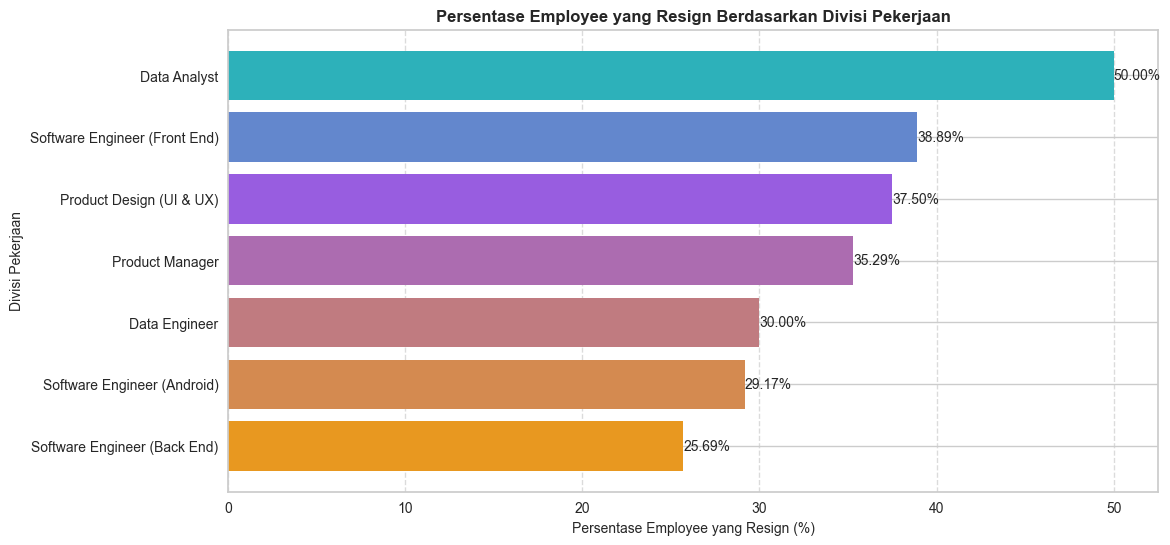

In [23]:
df2_per_resign = df2_per_resign.sort_values(by='ResignPercentage', ascending=False)
colors = ['#2db1ba',  '#6387cd',  '#985de0',  '#ac6cb0',  '#c07b80',  '#d48a50', '#e89820']

plt.figure(figsize=(12, 6))
bars = plt.barh(df2_per_resign['Pekerjaan'], df2_per_resign['ResignPercentage'], color=colors)
plt.xlabel('Persentase Employee yang Resign (%)', size=10)
plt.ylabel('Divisi Pekerjaan', size=10)
plt.title('Persentase Employee yang Resign Berdasarkan Divisi Pekerjaan', fontweight='bold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='left', fontsize=10)

    
plt.show()

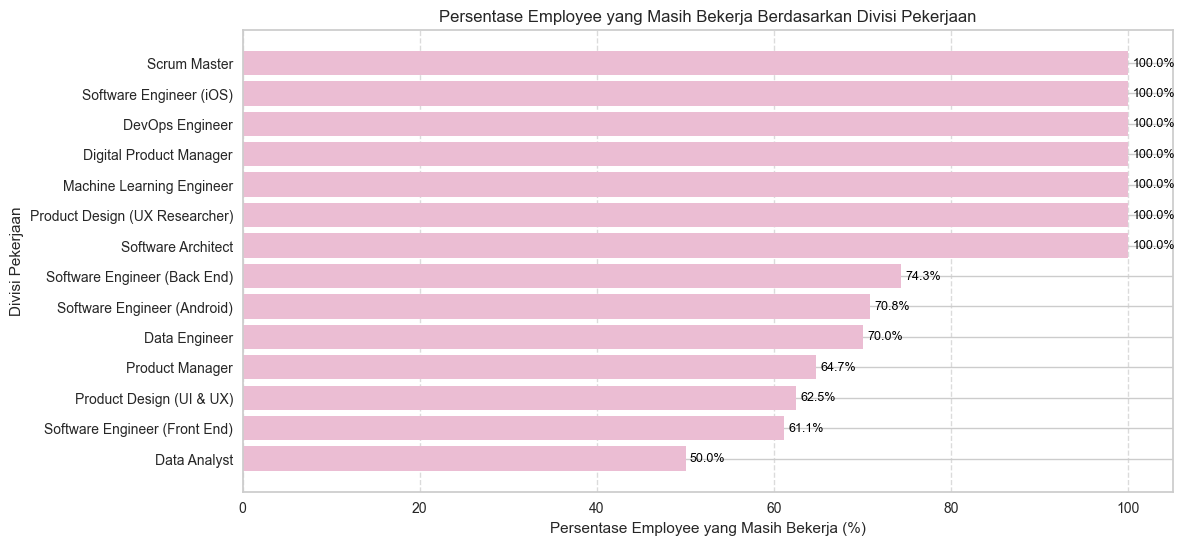

In [24]:
df2_per_still_working = df2_per_still_working.sort_values(by='StillWorkingPercentage', ascending=False)

# Plotting persentase karyawan yang masih bekerja berdasarkan divisi
plt.figure(figsize=(12, 6))
bars = plt.barh(df2_per_still_working['Pekerjaan'], df2_per_still_working['StillWorkingPercentage'], color='#ebbdd3')
plt.xlabel('Persentase Employee yang Masih Bekerja (%)')
plt.ylabel('Divisi Pekerjaan')
plt.title('Persentase Employee yang Masih Bekerja Berdasarkan Divisi Pekerjaan')
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  

# Menambahkan angka persentase di atas bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.1f}%', 
             va='center', ha='left', color='black', fontsize=9)

plt.show()

In [25]:
df2_jenjang_karir_resign = df2[df2['StatusResign']==1]['JenjangKarir'].value_counts()
df2_jenjang_karir_resign

JenjangKarir
Freshgraduate_program    50
Mid_level                23
Senior_level             16
Name: count, dtype: int64

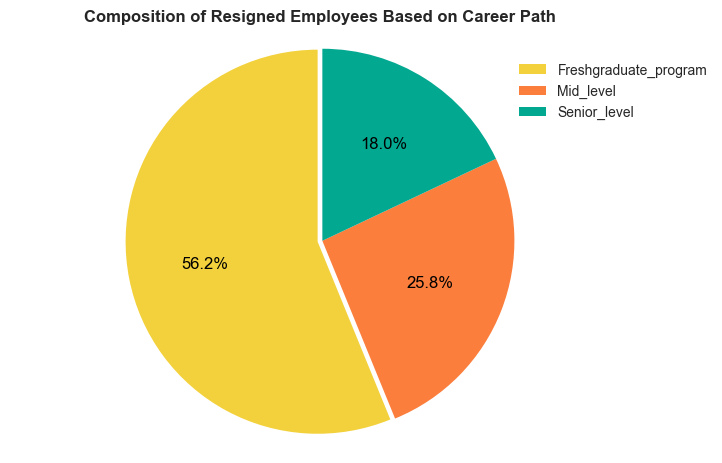

In [26]:
pie_explode = [0.025, 0, 0]
colors = ['#f3d13c', '#fb7e3c', '#02a890']

df2_jenjang_karir_resign.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':12, 'color':'black'}, labeldistance=None, explode=pie_explode)

plt.title('Composition of Resigned Employees Based on Career Path', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.axis('equal') 

plt.legend(bbox_to_anchor=(0.8, 0.95))

plt.show()

In [27]:
df2_performa_karyawan_resign = df2[df2['StatusResign']==1]['PerformancePegawai'].value_counts()
df2_performa_karyawan_resign

PerformancePegawai
Sangat_bagus     29
Biasa            26
Bagus            17
Sangat_kurang     9
Kurang            8
Name: count, dtype: int64

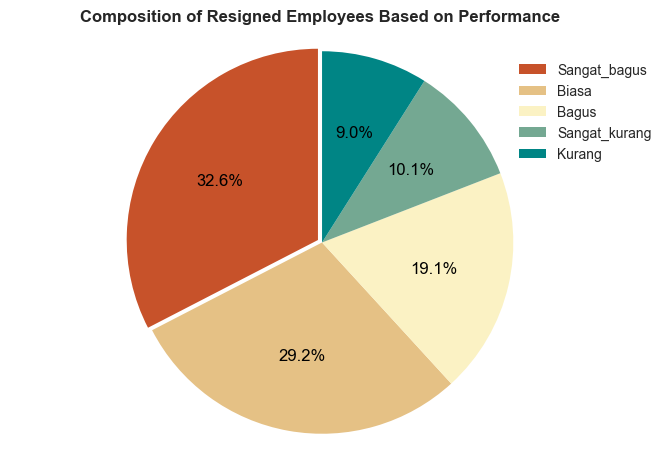

In [28]:
pie_explode = [0.025, 0, 0, 0, 0]
colors = ['#c7522a', '#e5c185', '#fbf2c4', '#74a892', '#008585']

df2_performa_karyawan_resign.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':12, 'color':'black'}, labeldistance=None, explode=pie_explode)

plt.title('Composition of Resigned Employees Based on Performance', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.axis('equal') 

plt.legend(bbox_to_anchor=(0.8, 0.95))

plt.show()

In [29]:
df2_alasan_resign = df2[df2['StatusResign'] == 1]['AlasanResign'].value_counts().reset_index()
df2_alasan_resign.columns = ['AlasanResign', 'Total']
df2_alasan_resign['PcgReason'] = (df2_alasan_resign['Total'] / sum(df2_alasan_resign['Total'])) * 100
df2_alasan_resign

,AlasanResign,Total,PcgReason
0,jam_kerja,16,17.977528
1,ganti_karir,14,15.730337
2,kejelasan_karir,11,12.359551
3,tidak_bisa_remote,11,12.359551
4,toxic_culture,10,11.235955
5,leadership,9,10.112360
6,tidak_bahagia,8,8.988764
7,internal_conflict,4,4.494382
8,unknown,4,4.494382
9,apresiasi,2,2.247191


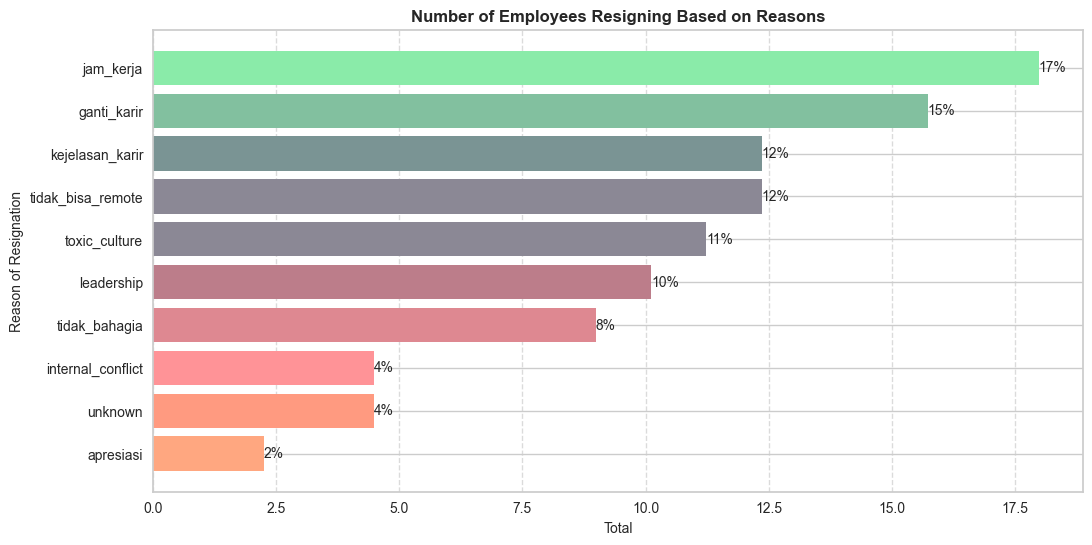

In [30]:
colors = ['#8aeba9', '#82c09f', '#7a9494', '#8b8895', '#8b8895', '#bc7d8a', '#de8891', '#ff9397', '#ff9a80', '#ffa780']

plt.figure(figsize=(12, 6))
bars = plt.barh(df2_alasan_resign['AlasanResign'], df2_alasan_resign['PcgReason'], color=colors)
plt.xlabel('Total', size=10)
plt.ylabel('Reason of Resignation', size=10)
plt.title('Number of Employees Resigning Based on Reasons', fontweight='bold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}%', va='center', ha='left', fontsize=10)

plt.show()

In [31]:
df2_reason_resign_count = df2[df2['StatusResign']==1].reset_index()
df2_reason_resign_count = df2_reason_resign_count.groupby(['Pekerjaan', 'AlasanResign']).size().reset_index(name='Jumlah')

idx = df2_reason_resign_count.groupby(['Pekerjaan'])['Jumlah'].transform(max) == df2_reason_resign_count['Jumlah']
df2_reason_resign_max = df2_reason_resign_count[idx].reset_index(drop=True)

df2_reason_resign_max = df2_reason_resign_max.sort_values(by='Jumlah', ascending=False)
df2_reason_resign_max

,Pekerjaan,AlasanResign,Jumlah
8,Software Engineer (Front End),tidak_bisa_remote,8
0,Data Analyst,toxic_culture,6
7,Software Engineer (Back End),jam_kerja,6
4,Product Design (UI & UX),jam_kerja,3
5,Product Manager,ganti_karir,3
6,Software Engineer (Android),ganti_karir,3
1,Data Engineer,apresiasi,1
2,Data Engineer,jam_kerja,1
3,Data Engineer,kejelasan_karir,1


In [32]:
df2_resign_analyst = df2[(df2['StatusResign']==1) & (df2['Pekerjaan']=='Data Analyst')]['AlasanResign'].value_counts()
df2_resign_analyst

AlasanResign
toxic_culture        6
internal_conflict    2
Name: count, dtype: int64

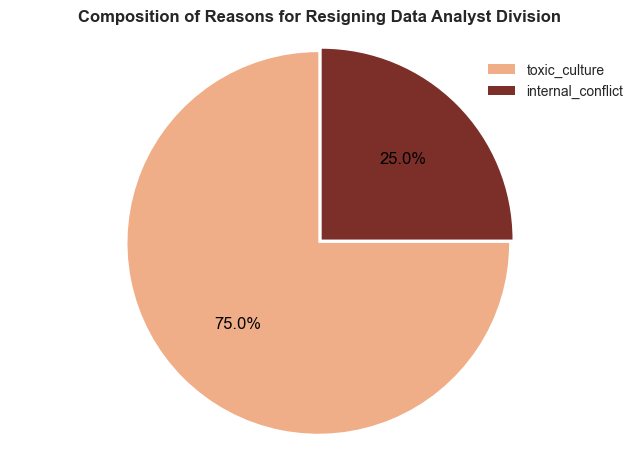

In [68]:
pie_explode = [0.025, 0]
colors = ['#f0ae88', '#7c2e28']

df2_resign_analyst.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':12, 'color':'black'}, labeldistance=None, explode=pie_explode)

plt.title('Composition of Reasons for Resigning Data Analyst Division', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.axis('equal') 

plt.legend(bbox_to_anchor=(0.75, 0.95))

plt.show()

In [34]:
df2_resign_frontend = df2[(df2['StatusResign']==1) & (df2['Pekerjaan']=='Software Engineer (Front End)')]['AlasanResign'].value_counts()
df2_resign_frontend

AlasanResign
tidak_bisa_remote    8
jam_kerja            4
kejelasan_karir      4
toxic_culture        3
leadership           3
ganti_karir          2
unknown              2
apresiasi            1
tidak_bahagia        1
Name: count, dtype: int64

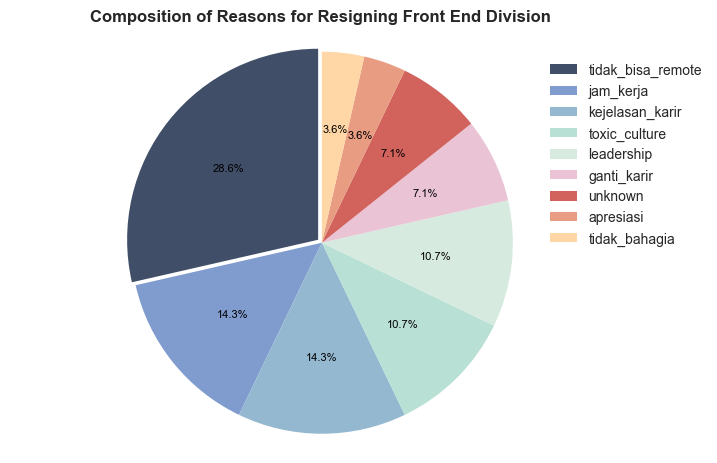

In [56]:
pie_explode = [0.025, 0, 0, 0, 0, 0, 0, 0, 0]
colors = ['#404e67', '#809bce', '#95b8d1', '#b8e0d4', '#d6eadf', '#eac4d5', '#d1625c', '#e89c81', '#ffd6a5']

df2_resign_frontend.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':8, 'color':'black'}, labeldistance=None, explode=pie_explode)

plt.title('Composition of Reasons for Resigning Front End Division', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.axis('equal') 

plt.legend(bbox_to_anchor=(0.85, 0.95))

plt.show()

In [57]:
df2_resign_uiux = df2[(df2['StatusResign']==1) & (df2['Pekerjaan']=='Product Design (UI & UX)')]['AlasanResign'].value_counts()
df2_resign_uiux

AlasanResign
jam_kerja        3
ganti_karir      2
tidak_bahagia    2
unknown          1
leadership       1
Name: count, dtype: int64

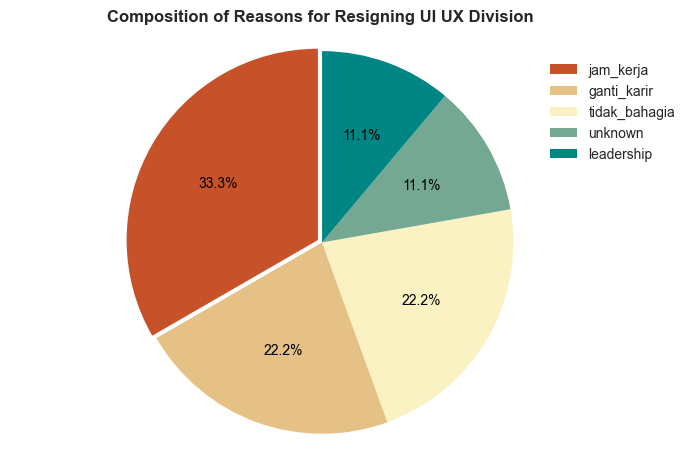

In [65]:
pie_explode = [0.025, 0, 0, 0, 0]
colors = ['#c7522a', '#e5c185', '#fbf2c4', '#74a892', '#008585']

df2_resign_uiux.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':10, 'color':'black'}, labeldistance=None, explode=pie_explode)

plt.title('Composition of Reasons for Resigning UI UX Division', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.axis('equal') 

plt.legend(bbox_to_anchor=(0.85, 0.95))

plt.show()

## Building Model Machine Learning

In [71]:
df2.columns

Index(['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan',
       'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'IkutProgramLOP',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign', 'Umur', 'LamaBekerja',
       'StatusResign', 'YearHiring', 'YearResign'],
      dtype='object')

In [135]:
# membuang fitur yang tidak berguna dan fitur yang beresiko
feature_selected = df2.drop(['StatusPernikahan', 'JenisKelamin', 'AsalDaerah', 'HiringPlatform', 'TanggalLahir', 
                             'IkutProgramLOP','TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign',
                             'YearHiring', 'YearResign'], axis=1)

In [136]:
feature_selected.isna().sum()

StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
TingkatPendidikan                     0
AlasanResign                          0
Umur                                  0
LamaBekerja                           0
StatusResign                          0
dtype: int64

In [137]:
feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusKepegawaian                   287 non-null    object 
 1   Pekerjaan                           287 non-null    object 
 2   JenjangKarir                        287 non-null    object 
 3   PerformancePegawai                  287 non-null    object 
 4   SkorSurveyEngagement                287 non-null    int64  
 5   SkorKepuasanPegawai                 287 non-null    float64
 6   JumlahKeikutsertaanProjek           287 non-null    float64
 7   JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 8   JumlahKetidakhadiran                287 non-null    float64
 9   TingkatPendidikan                   287 non-null    object 
 10  AlasanResign                        287 non-null    object 
 11  Umur                                287 non-n

In [138]:
# cek imbalance data
feature_selected['StatusResign'].value_counts(normalize=True)

StatusResign
0    0.689895
1    0.310105
Name: proportion, dtype: float64

In [164]:
clf_setup = setup(data=feature_selected,
                  session_id=42,
                  categorical_features=['StatusKepegawaian', 'Pekerjaan', 'AlasanResign'],
                  ordinal_features={'JenjangKarir':['Freshgraduate_program', 'Mid_level', 'Senior_level'],
                                   'PerformancePegawai':['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
                                   'TingkatPendidikan':['Sarjana', 'Magister', 'Doktor']},
                  fix_imbalance=True,
                  fix_imbalance_method='SMOTE',
                  normalize=True,
                  normalize_method='zscore',
                  remove_multicollinearity=True,
                  target='StatusResign',
                  train_size=0.8,
                 )

,Description,Value
0,Session id,42
1,Target,StatusResign
2,Target type,Binary
3,Original data shape,"(287, 14)"
4,Transformed data shape,"(374, 38)"
5,Transformed train set shape,"(316, 38)"
6,Transformed test set shape,"(58, 38)"
7,Ordinal features,3
8,Numeric features,7
9,Categorical features,3


In [179]:
best_model = compare_models(['lr', 'knn', 'svm', 'dt', 'rf', 'ada', 'nb', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9870,0.9955,0.9589,1.0000,0.9779,0.9687,0.9702,0.5320
rf,Random Forest Classifier,0.9870,0.9948,0.9589,1.0000,0.9779,0.9687,0.9702,0.1300
ada,Ada Boost Classifier,0.9870,0.9932,0.9589,1.0000,0.9779,0.9687,0.9702,0.1830
nb,Naive Bayes,0.9870,0.9957,0.9589,1.0000,0.9779,0.9687,0.9702,0.1160
lightgbm,Light Gradient Boosting Machine,0.9826,0.9940,0.9589,0.9875,0.9713,0.9589,0.9608,0.1620
dt,Decision Tree Classifier,0.9783,0.9732,0.9589,0.9750,0.9646,0.9490,0.9513,0.0510
svm,SVM - Linear Kernel,0.9648,0.9827,0.9304,0.9589,0.9427,0.9174,0.9193,0.0510
knn,K Neighbors Classifier,0.9476,0.9687,0.8304,1.0000,0.9062,0.8704,0.8785,0.0510


In [183]:
model_nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9565,0.9821,0.8571,1.0000,0.9231,0.8930,0.8982
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9565,0.9911,0.8571,1.0000,0.9231,0.8930,0.8982
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9565,0.9833,0.8750,1.0000,0.9333,0.9013,0.9057


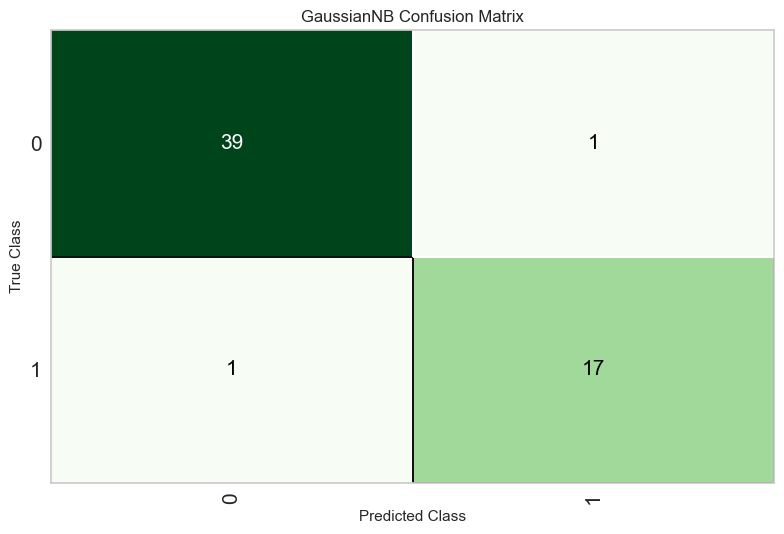

In [184]:
plot_model(model_nb, plot='confusion_matrix')

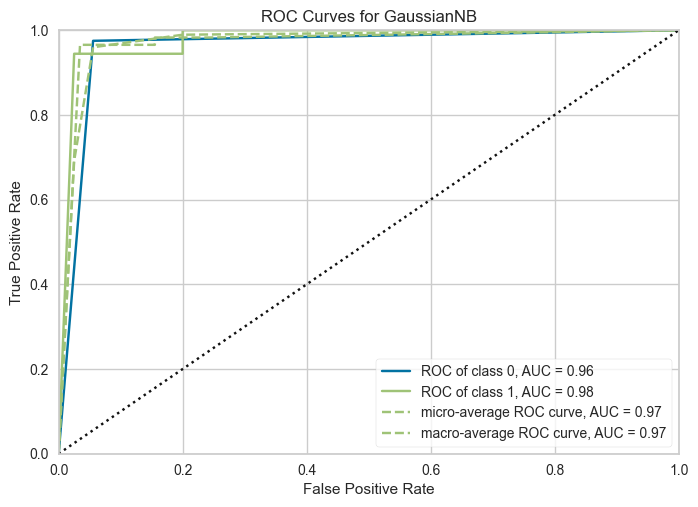

In [185]:
plot_model(model_nb, plot='auc')

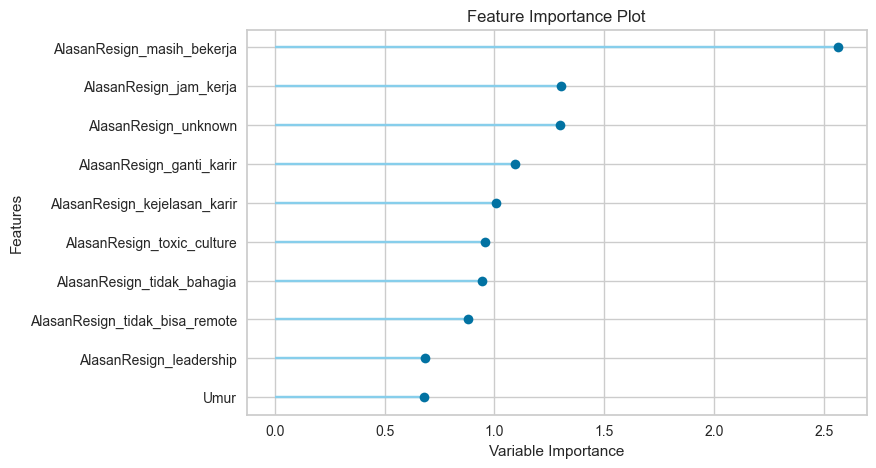

In [187]:
plot_model(best_model, plot='feature')

In [188]:
import shap

In [202]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9565,0.9777,0.8571,1.0000,0.9231,0.8930,0.8982
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9565,0.9866,0.8571,1.0000,0.9231,0.8930,0.8982
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9565,0.9833,0.8750,1.0000,0.9333,0.9013,0.9057


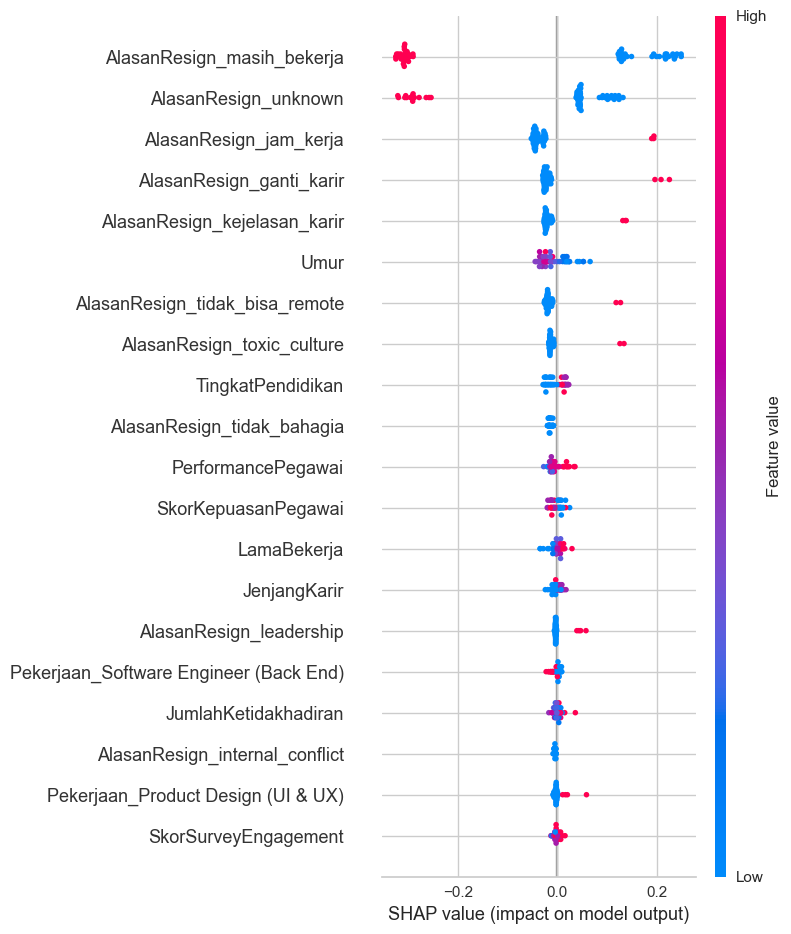

In [203]:
interpret_model(rf_model)